# Pymaceuticals Inc.
---

### Analysis
- The mean and median tumor volume for each drug regimen are close, which indicates stable and consistent distribution of tumor volumes across each drug regimen.
- Ketapril has the highest variance and standard deviation, suggesting that mice treated by Ketapril are more widely spread out than others. 
- Ramicane has the lowest standard error which indicates a relatively precise estimate of the mean tumor volume compared to other drug regimens. 
- Capomulin has the highest # of observed mouse timepoints which indicates longer treatment period and longer surivaval for mice treated with this drug.
- There's an almost equal distribution on the sex of mice tested with 51% male and 49% female.
- Among Capomulin, Ramicane, Infubinol, and Ceftamin, Infubinol has outliers. This indicates that some mice receiving Infubinol treatment responded differently from the majority. This variability could be due to various factors which need to be further studied especially when ensuring efficacy and safety.
- There is a strong positive correlation between the weight and ave tumor size for those mice treated with Capomulin at .84. Bigger mice wieght corresponds to bigger tumor volume size, with few outliers. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_study_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_study_data = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_mouse_study_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_data = mouse_study_data[mouse_study_data['Mouse ID'] != 'g989']
clean_mouse_study_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse_study_data["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_data = clean_mouse_study_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen_data['Tumor Volume (mm3)'].mean()
median = drug_regimen_data['Tumor Volume (mm3)'].median()
variance = drug_regimen_data['Tumor Volume (mm3)'].var()
std_deviation = drug_regimen_data['Tumor Volume (mm3)'].std()
sem = drug_regimen_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
drug_regimen_table = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_deviation,
    'Tumor Volume Std. Err.': sem})
drug_regimen_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary = clean_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

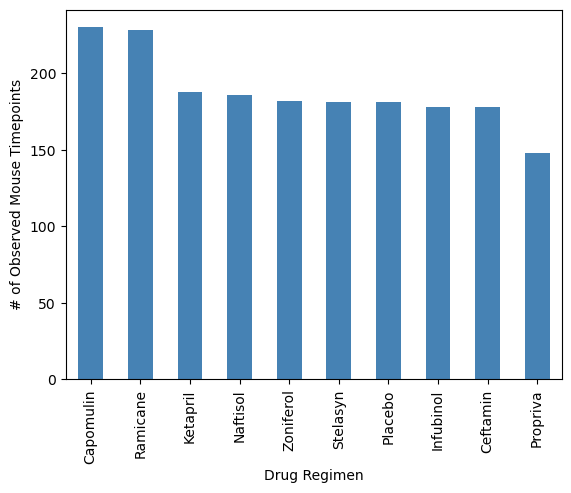

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

clean_mouse_study_data['Drug Regimen'].value_counts().plot(kind='bar', color='steelblue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()




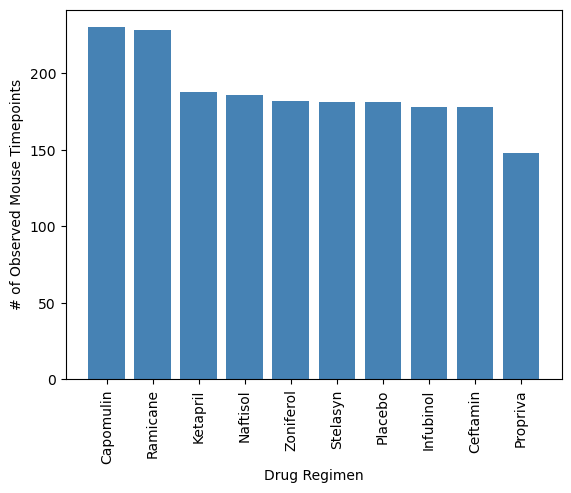

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_mouse_study_data['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='steelblue')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

In [11]:
#Get the number of female vs male mice 
female_male_count = clean_mouse_study_data['Sex'].value_counts()
female_male_count

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel='Sex'>

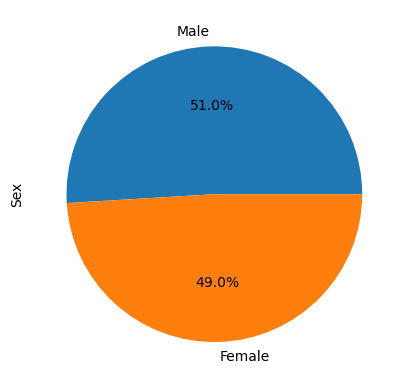

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_male_pie = {'Gender': ['Male', 'Female'],'Sex': [958, 922]} 
df = pd.DataFrame(female_male_pie)
df.plot.pie(y='Sex', labels=df['Gender'], autopct='%1.1f%%', legend=False)


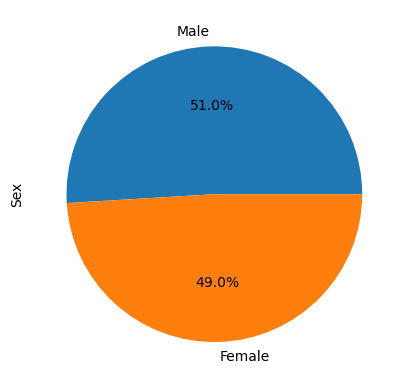

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
sizes = [958, 922]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_study_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = max_timepoint.merge(clean_mouse_study_data,on=['Mouse ID', 'Timepoint'],how='left')

# Filter the data for the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_four_treatments = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(four_treatments)]
final_tumor_volume_four_treatments.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Define the list of treatments for the loop
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to store tumor volume data and potential outliers for each treatment regimen
treatment_data = {}

# Loop through each treatment regimen
for treatment in four_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_four_treatments.loc[final_tumor_volume_four_treatments['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Calculate the bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    # Store the tumor volume data and potential outliers for each treatment regimen in the dictionary
    treatment_data[treatment] = {'tumor_volume': tumor_volume, 'outliers': outliers}
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


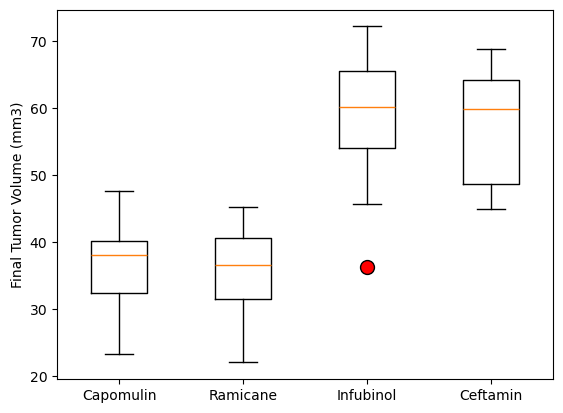

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
four_tumor_volume = final_tumor_volume_four_treatments.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
reordered_labels = four_tumor_volume.index.tolist()
reordered_labels[1], reordered_labels[3] = reordered_labels[3], reordered_labels[1]
flierprops = dict(marker='o', markersize=10, markerfacecolor='red')  
plt.boxplot(four_tumor_volume[reordered_labels].values, labels=reordered_labels, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

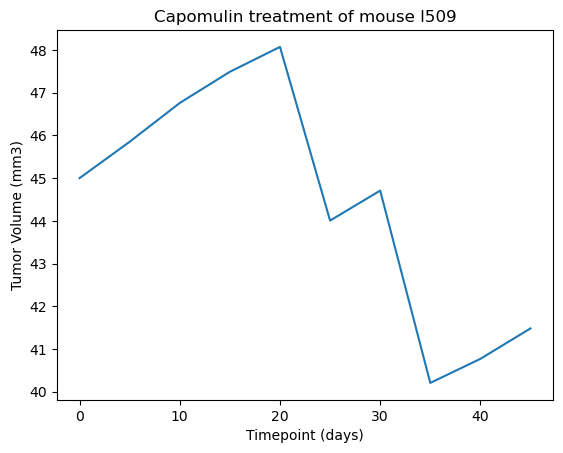

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_study_data.loc[clean_mouse_study_data['Drug Regimen'] == 'Capomulin']
mouse_l509 = capomulin_data.loc[capomulin_data['Mouse ID']=='l509']
mouse_l509

x = mouse_l509['Timepoint']
y = mouse_l509['Tumor Volume (mm3)']

plt.plot(x, y) 
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


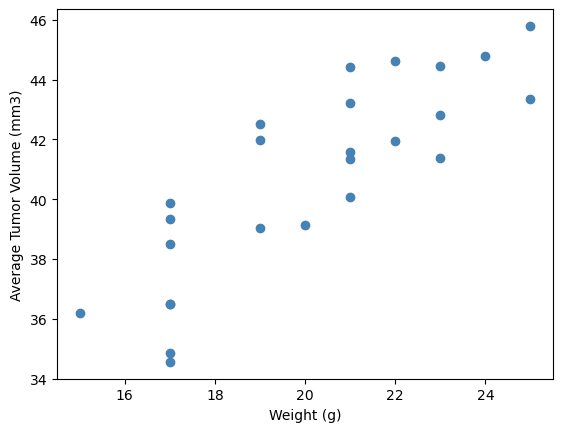

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the data by Mouse ID and calculate the average tumor volume for each mouse
ave_capomulin_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
capomulin_mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(capomulin_mouse_weight, ave_capomulin_tumor, marker="o", facecolors="steelblue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


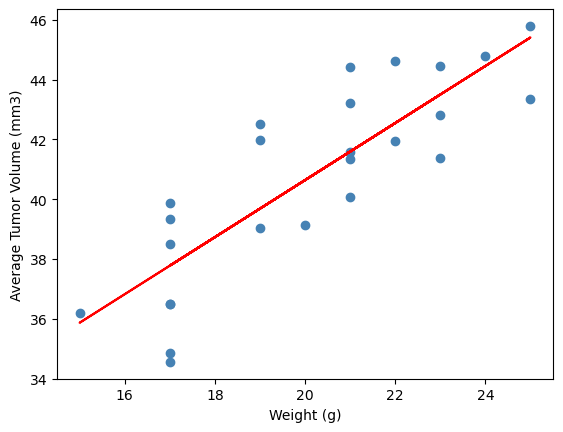

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Calculate correlation coefficient between mouse weight and tumor volume
correlation_coefficient, _ = pearsonr(capomulin_mouse_weight, ave_capomulin_tumor)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")

# Create a linear regression model
X = capomulin_mouse_weight.values.reshape(-1, 1)
y = ave_capomulin_tumor.values
model = LinearRegression()
model.fit(X, y)
# Plot the data points and the linear regression line
plt.scatter(X, y, color='steelblue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()